In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import markov
import evaluate_markov

/Users/daria/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
n = 1000
l = 4000
file = '/Users/daria/Downloads/sequence (2).fasta' # Escherichia coli str. K-12 substr. MG1655

In [3]:
model1 = markov.Bernoully()
model2 = markov.Markov1st()
model3 = markov.Markov2nd()
model4 = markov.Markov3rd()
model1.fit(n=n, l=l, file=file)
model2.fit(n=n, l=l, file=file)
model3.fit(n=n, l=l, file=file)
model4.fit(n=n, l=l, file=file)

100%|██████████| 4/4 [00:00<00:00, 17848.10it/s]


In [4]:
AIC_scores, BIC_scores = {}, {}
for model_name, model in zip(['Bernoully', 'Markov1st', 'Markov2nd', 'Markov3rd'],
                             [model1, model2, model3, model4]):

    AIC_score, BIC_score = evaluate_markov.calc_model_score(model, file, n, l)
    print(f'{model_name}: \nAIC: {round(AIC_score,2)}\tBIC: {round(BIC_score, 2)}')
    AIC_scores[model_name] = AIC_score
    BIC_scores[model_name] = BIC_score

Bernoully: 
AIC: 11093133.9	BIC: 11093133.9
Markov1st: 
AIC: 3745355.39	BIC: 3745433.91
Markov2nd: 
AIC: 6592885.89	BIC: 6593514.08
Markov3rd: 
AIC: 11388380.8	BIC: 11392149.96


In [5]:
def plot_scores(scores):
    scores['index'] = [0]
    scores = pd.DataFrame.from_dict(scores).T.reset_index()
    scores.iloc[:,1] = [scores.iloc[i,1] / scores.iloc[0,1] for i in range(scores.shape[0] - 1)] + [0]
    sns.catplot(data=scores.iloc[:-1, :], x='index', y=0, kind='bar')

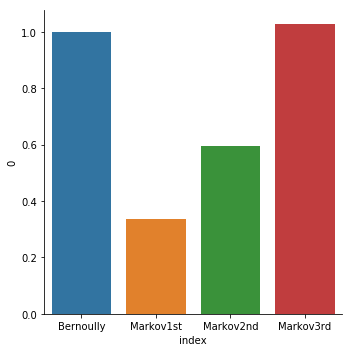

In [6]:
plot_scores(AIC_scores)

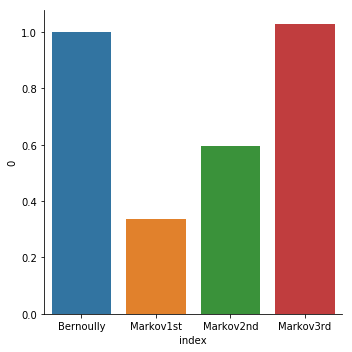

In [7]:
plot_scores(BIC_scores)

Попробуем другую последовательность: Rickettsia prowazekii str. Chernikova

In [8]:
n = 1000
l = 1000
file = '/Users/daria/Downloads/sequence (3).fasta'

In [9]:
model1 = markov.Bernoully()
model2 = markov.Markov1st()
model3 = markov.Markov2nd()
model4 = markov.Markov3rd()
model1.fit(n=n, l=l, file=file)
model2.fit(n=n, l=l, file=file)
model3.fit(n=n, l=l, file=file)
model4.fit(n=n, l=l, file=file)

100%|██████████| 4/4 [00:00<00:00, 15753.25it/s]


In [10]:
AIC_scores, BIC_scores = {}, {}
for model_name, model in zip(['Bernoully', 'Markov1st', 'Markov2nd', 'Markov3rd'],
                             [model1, model2, model3, model4]):

    AIC_score, BIC_score = evaluate_markov.calc_model_score(model, file, n, l)
    print(f'{model_name}: \nAIC: {round(AIC_score,2)}\tBIC: {round(BIC_score, 2)}')
    AIC_scores[model_name] = AIC_score
    BIC_scores[model_name] = BIC_score

Bernoully: 
AIC: 2590952.7	BIC: 2590952.7
Markov1st: 
AIC: 951955.43	BIC: 952033.95
Markov2nd: 
AIC: 673855.38	BIC: 674483.57
Markov3rd: 
AIC: 2340756.28	BIC: 2344525.44


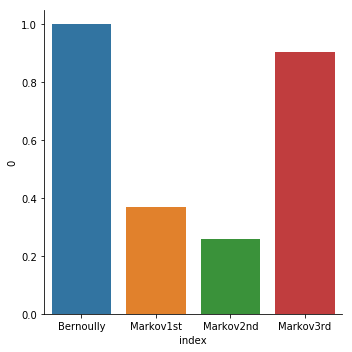

In [11]:
plot_scores(AIC_scores)

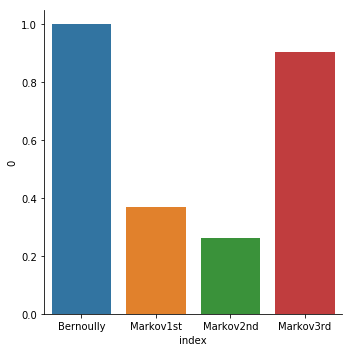

In [12]:
plot_scores(BIC_scores)